In [70]:
#importing the necessary libraries which are essential for the mmachine learning model.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler
import warnings

warnings.filterwarnings('ignore')

In [71]:
#loading the data set
data = pd.read_csv('/content/drive/MyDrive/final_dataset.csv/final_dataset.csv')
data.tail()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
12794622,1725894,172.31.67.50-209.85.203.113-53598-80-6,209.85.203.113,80,172.31.67.50,53598,6,20/02/2018 05:14:52,50,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
12794623,5681778,172.31.69.17-108.174.10.14-54599-443-6,172.31.69.17,54599,108.174.10.14,443,6,20/02/2018 03:08:35,306,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
12794624,6395326,172.31.0.2-172.31.65.49-53-61087-17,172.31.65.49,61087,172.31.0.2,53,17,20/02/2018 01:03:19,362,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
12794625,4926899,172.31.0.2-172.31.67.58-53-61580-17,172.31.67.58,61580,172.31.0.2,53,17,20/02/2018 12:43:11,303,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
12794626,7656685,169.254.169.254-172.31.65.89-80-49393-6,172.31.65.89,49393,169.254.169.254,80,6,20/02/2018 09:55:40,54,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [154]:
#we are importing only fraction of the data as the dataset contain more than 10 milllion datapoints.
sampled_df = data.sample(frac=0.01, random_state=42)

In [155]:

sampled_df.to_csv('sampled_data.csv', index=False)

In [156]:
sampled_df.shape

(127946, 85)

In [157]:
#checking the unique values in the label
sampled_df['Label'].unique()

array(['ddos', 'Benign'], dtype=object)

In [158]:
sampled_df.describe()

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.279460e+05,127946.000000,127946.000000,127946.000000,1.279460e+05,127946.000000,127946.000000,1.279460e+05,1.279460e+05,127946.000000,...,127946.000000,127946.000000,1.279460e+05,1.279460e+05,1.279460e+05,1.279460e+05,1.279460e+05,1.279460e+05,1.279460e+05,1.279460e+05
mean,2.668770e+06,37100.262361,14594.024315,7.823254,8.168855e+06,16.261188,5.219132,7.805128e+02,3.418384e+03,292.280743,...,13.243407,8.131337,1.367137e+05,7.040911e+04,2.047337e+05,8.938734e+04,3.112637e+06,1.060413e+05,3.204052e+06,3.014091e+06
std,2.174315e+06,25189.358280,23021.875080,4.198160,2.464626e+07,1203.099364,139.538417,3.848871e+04,2.022913e+05,392.338901,...,1202.104256,9.147491,2.317859e+06,1.454287e+06,3.089377e+06,1.942737e+06,1.211613e+07,1.371144e+06,1.235522e+07,1.199074e+07
min,2.600000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.933132e+05,443.000000,80.000000,6.000000,1.257000e+03,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.045185e+06,50588.000000,80.000000,6.000000,3.195700e+04,2.000000,1.000000,4.200000e+01,1.120000e+02,40.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.933683e+06,56171.750000,38559.500000,6.000000,4.156586e+06,4.000000,4.000000,9.350000e+02,3.570000e+02,677.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.902473e+06,65534.000000,65534.000000,17.000000,1.199998e+08,152639.000000,21555.000000,4.884448e+06,3.114136e+07,6021.000000,...,152639.000000,44.000000,1.112534e+08,7.487429e+07,1.112534e+08,1.112534e+08,1.199348e+08,4.840799e+07,1.199348e+08,1.199348e+08


In [159]:
#checking the data types and number of column and rows in the dataset.
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127946 entries, 4976237 to 3086572
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         127946 non-null  int64  
 1   Flow ID            127946 non-null  object 
 2   Src IP             127946 non-null  object 
 3   Src Port           127946 non-null  int64  
 4   Dst IP             127946 non-null  object 
 5   Dst Port           127946 non-null  int64  
 6   Protocol           127946 non-null  int64  
 7   Timestamp          127946 non-null  object 
 8   Flow Duration      127946 non-null  int64  
 9   Tot Fwd Pkts       127946 non-null  int64  
 10  Tot Bwd Pkts       127946 non-null  int64  
 11  TotLen Fwd Pkts    127946 non-null  float64
 12  TotLen Bwd Pkts    127946 non-null  float64
 13  Fwd Pkt Len Max    127946 non-null  float64
 14  Fwd Pkt Len Min    127946 non-null  float64
 15  Fwd Pkt Len Mean   127946 non-null  float64


In [160]:
#counting the number of values of each attack.
sampled_df['Label'].value_counts()

ddos      64670
Benign    63276
Name: Label, dtype: int64

In [161]:
#mapping with the protocol and label and to number of attacks happening in each category.

attack_protocol = pd.crosstab(sampled_df.Label, sampled_df.Protocol)
attack_protocol

Protocol,0,6,17
Label,,,
Benign,1120,40363,21793
ddos,0,64645,25


Text(0.5, 1.0, 'Target Variable')

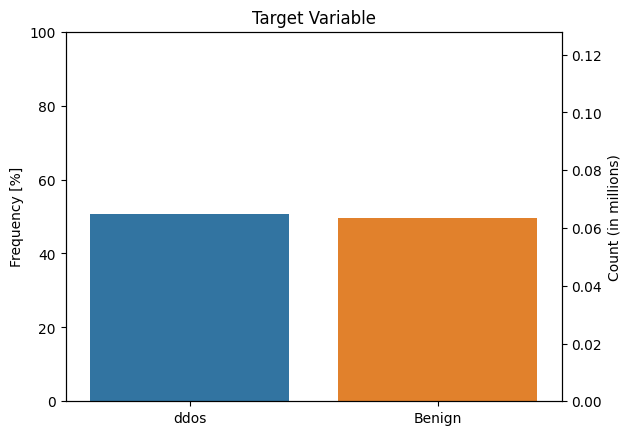

In [162]:
#plotting the target variable the number of unique featuers in a flow chart.

labelCount = sampled_df['Label'].value_counts(normalize=True)*100
ax = sns.barplot(x=labelCount.index, y=labelCount.values)
ax1 = ax.twinx()
ax.set_ylabel('Frequency [%]')
ax1.set_ylabel("Count (in millions)")
ax1.set_ylim(0, len(sampled_df)/10**6)
ax.set_ylim(0, 100)
plt.title('Target Variable')

<Axes: xlabel='Protocol', ylabel='Count'>

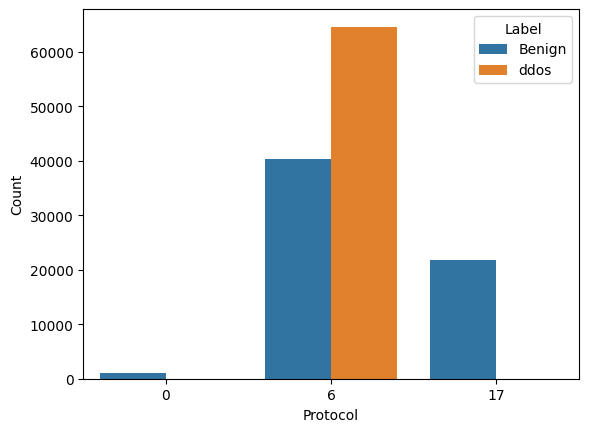

In [163]:
#we are mapping the protocol with the target label.

cnt = pd.crosstab(sampled_df['Protocol'], sampled_df['Label'])
cnt = cnt.stack().reset_index().rename(columns={0: 'Count'})
sns.barplot(x=cnt['Protocol'], y=cnt['Count'], hue=cnt['Label'])

In [164]:
#in our dataset the ip address are given we define the value ranges and mapping them in order to use them for the chart.
def getNetworkClass(col):
    networkClasses = sampled_df[col].str.split('.',n=1, expand=True)[0]
    networkClasses = networkClasses.astype('uint8')
    networkClasses = pd.cut(
        networkClasses,
        bins=[0, 127, 191, 223, 239, np.inf],
        labels=['A', 'B', 'C', 'D', 'E'],
        include_lowest=True
    )
    return networkClasses

In [165]:
srcNetworkClass = getNetworkClass('Src IP')
dstNetworkClass = getNetworkClass('Dst IP')

<Axes: xlabel='Class', ylabel='Count'>

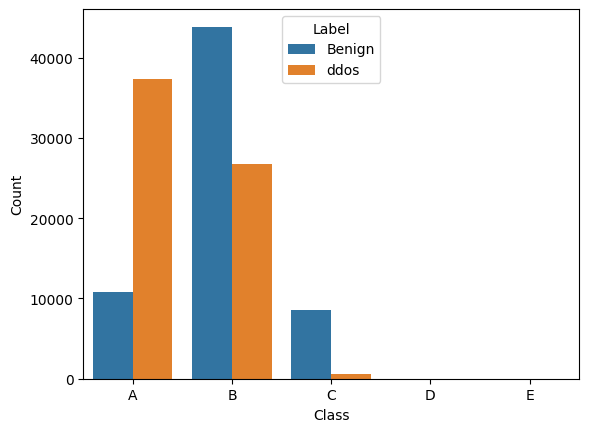

In [166]:
#mapping our target label with the ip address class

cnt = pd.crosstab(srcNetworkClass, sampled_df['Label'], rownames=['Class'])
cnt = cnt.stack().reset_index().rename(columns={0: 'Count'})
sns.barplot(x=cnt['Class'], y=cnt['Count'], hue=cnt['Label'])

In [167]:
sampled_df.isnull().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 85, dtype: int64

In [168]:
#calculating the duplicates.

sampled_df.duplicated().sum()

0

In [169]:
# we are dropping the null values and the duplicates.
df_data= sampled_df.dropna(axis=0);
df_data = sampled_df.drop_duplicates()

In [170]:
#we are replacing the infinity values to nan
sampled_df.replace([np.inf, -np.inf], np.nan, inplace=True)

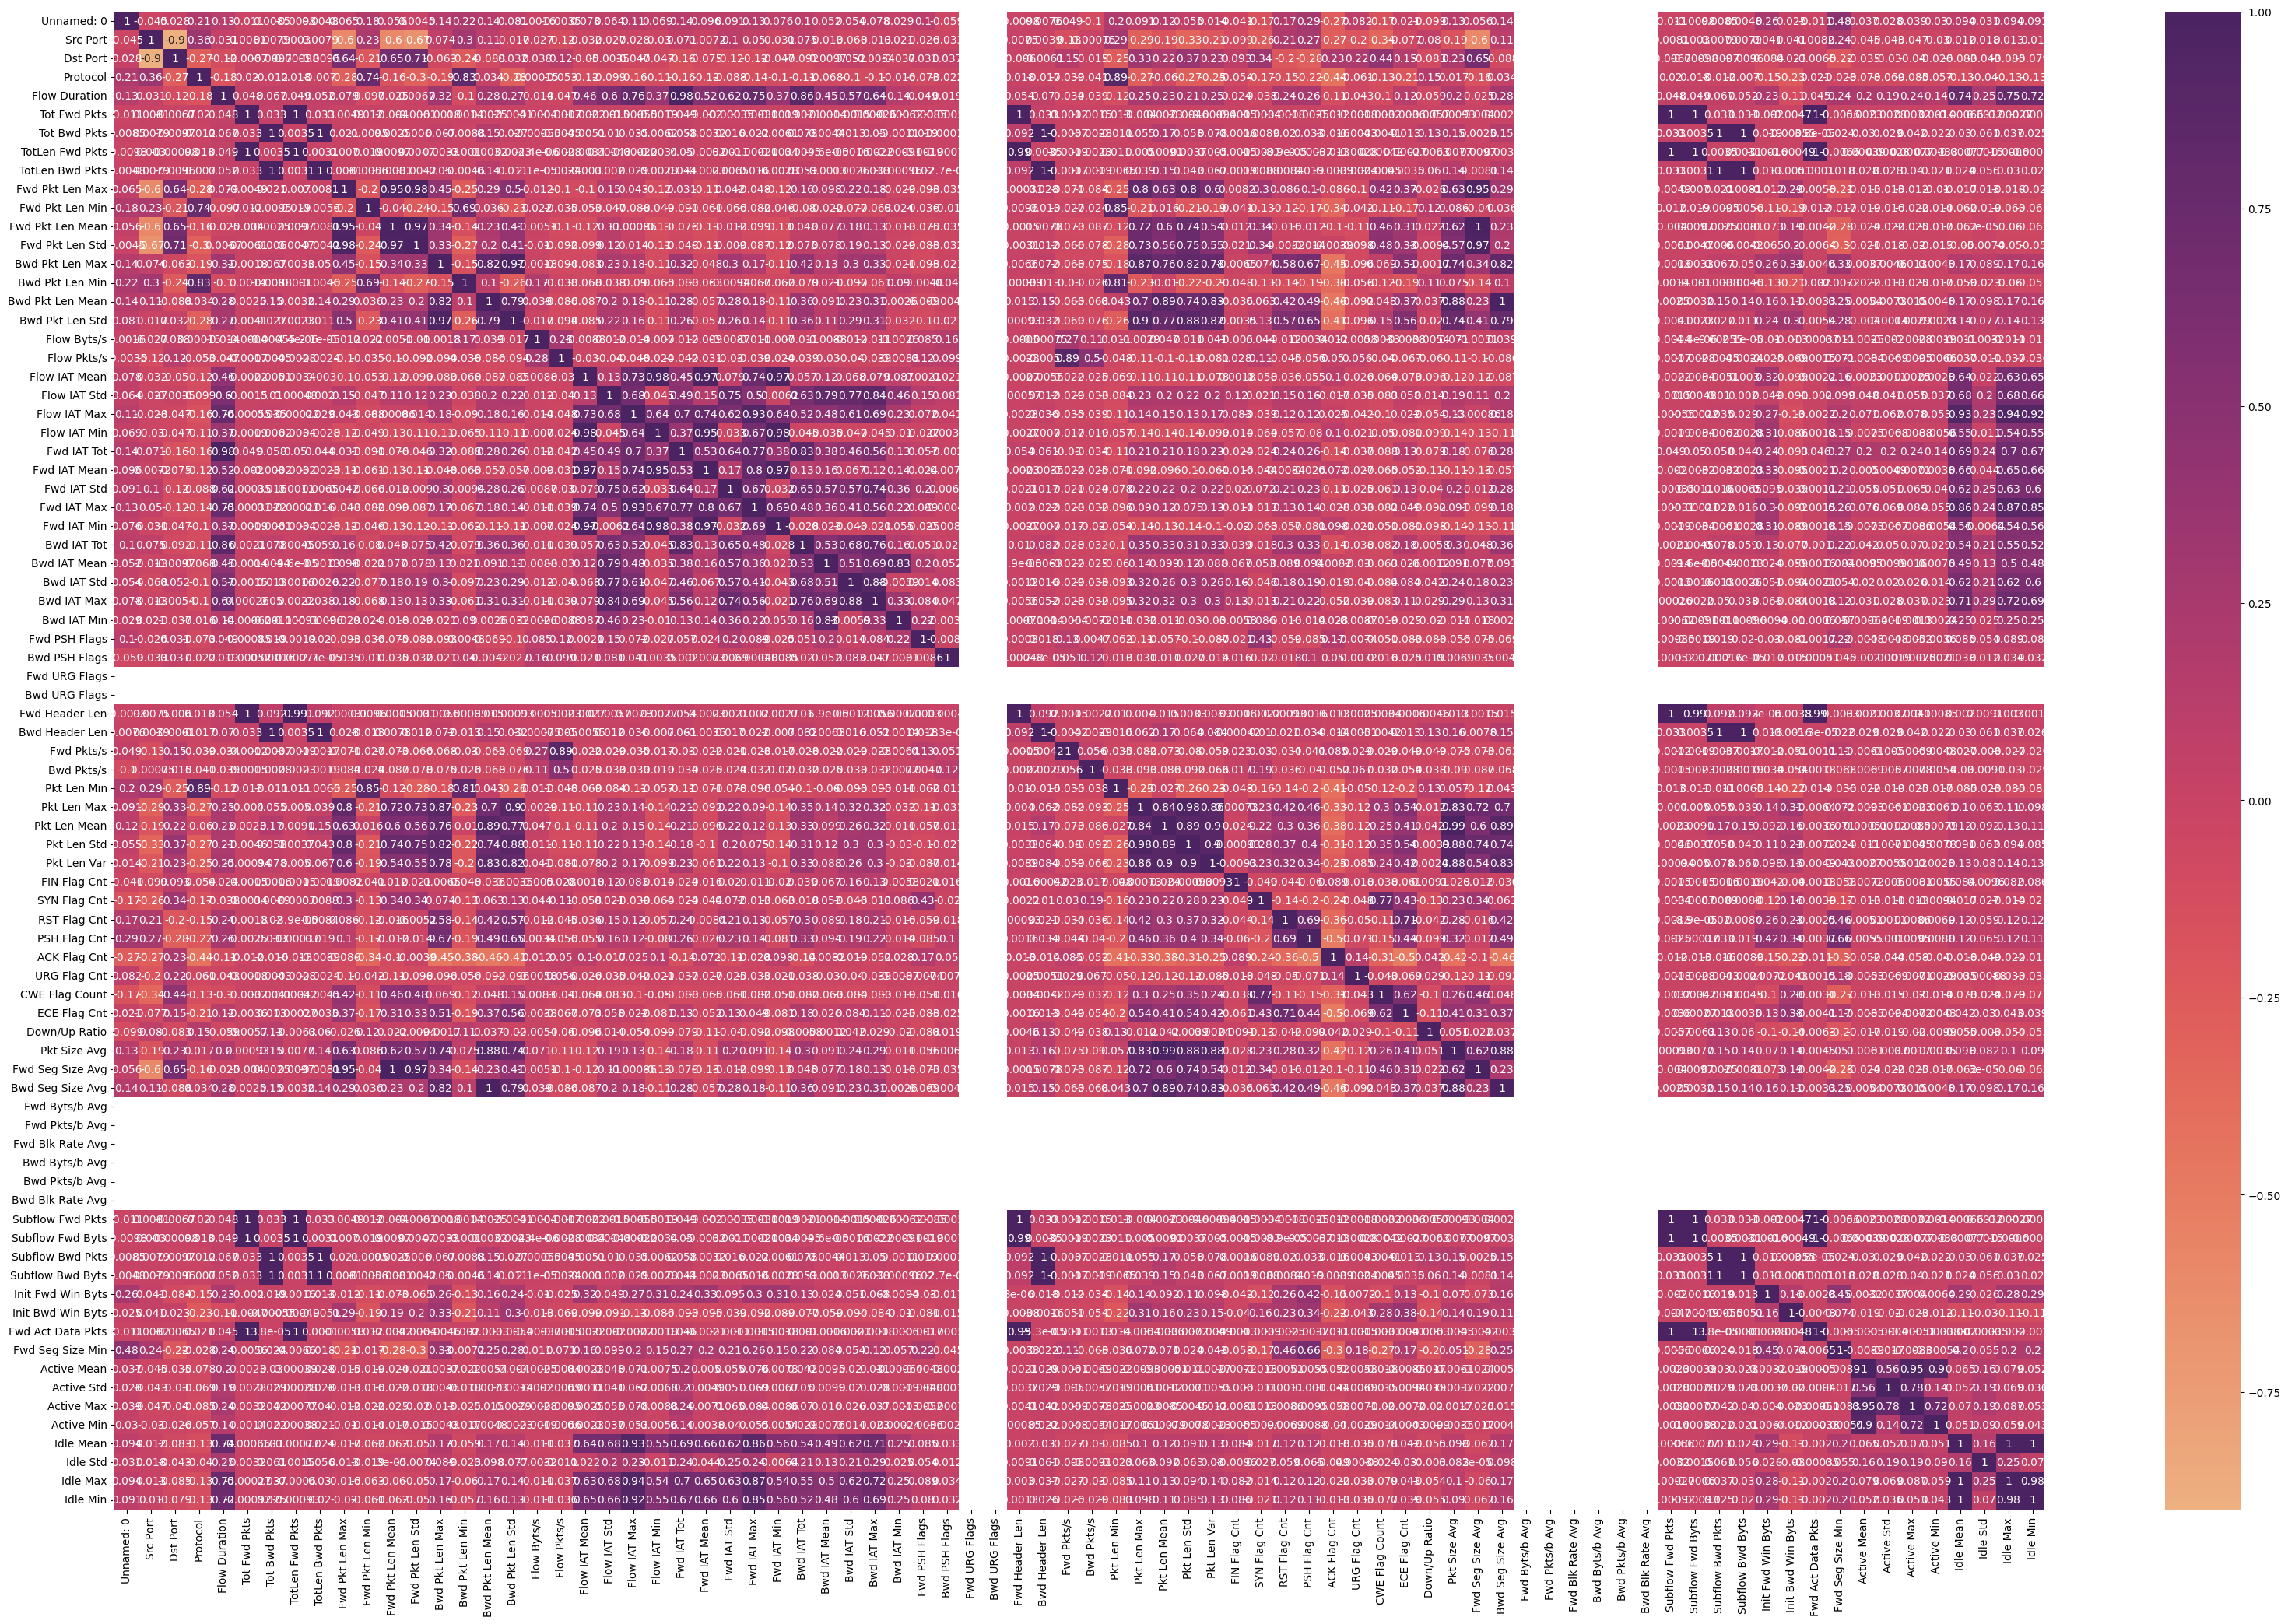

In [171]:
#mapping the correlation matrix for the enetire data.

plt.figure(figsize=(40,25))
sns.heatmap(sampled_df.corr(),annot= True,cmap = 'flare')
plt.show()

In [172]:
#calculation th correlation matrix.

corr_matrix = sampled_df.corr().abs()
corr_matrix

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Unnamed: 0,1.000000,0.044916,0.027503,0.205232,0.132017,0.010849,0.008477,0.009820,0.004762,0.065175,...,0.011401,0.478705,0.036923,0.028188,0.039222,0.029502,0.093757,0.030845,0.094426,0.091499
Src Port,0.044916,1.000000,0.898903,0.356420,0.031105,0.008080,0.007859,0.003039,0.007909,0.596494,...,0.008242,0.238928,0.044795,0.042811,0.046531,0.030256,0.012221,0.017905,0.013317,0.009997
Dst Port,0.027503,0.898903,1.000000,0.272937,0.118231,0.006674,0.009664,0.000977,0.009635,0.638770,...,0.006485,0.216030,0.034825,0.030309,0.039889,0.026296,0.082903,0.043251,0.085283,0.079140
Protocol,0.205232,0.356420,0.272937,1.000000,0.175022,0.020373,0.011710,0.017834,0.006980,0.276840,...,0.021345,0.027676,0.077645,0.068916,0.084890,0.056790,0.128806,0.039564,0.130015,0.126042
Flow Duration,0.132017,0.031105,0.118231,0.175022,1.000000,0.048362,0.066654,0.049297,0.051719,0.079407,...,0.045176,0.239348,0.200055,0.192567,0.238018,0.141736,0.741481,0.246522,0.751343,0.721282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.029502,0.030256,0.026296,0.056790,0.141736,0.001353,0.022133,0.000378,0.020510,0.010385,...,0.000383,0.000540,0.900131,0.140352,0.724485,1.000000,0.050718,0.089889,0.058827,0.043436
Idle Mean,0.093757,0.012221,0.082903,0.128806,0.741481,0.000659,0.029965,0.000770,0.024051,0.017467,...,0.001974,0.199991,0.064966,0.052098,0.069665,0.050718,1.000000,0.156222,0.995042,0.995945
Idle Std,0.030845,0.017905,0.043251,0.039564,0.246522,0.003226,0.060929,0.001486,0.056153,0.013071,...,0.000353,0.054702,0.160357,0.193205,0.192052,0.089889,0.156222,1.000000,0.248438,0.069939
Idle Max,0.094426,0.013317,0.085283,0.130015,0.751343,0.000273,0.036513,0.000605,0.030296,0.016185,...,0.001971,0.200456,0.079384,0.069408,0.087136,0.058827,0.995042,0.248438,1.000000,0.982818


In [173]:
#we are only taking the uppertrianlge and setting the correlation factor to 0.95

mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper = corr_matrix.where(mask)
#correlations greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Std',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd Header Len',
 'Bwd Header Len',
 'Pkt Len Std',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Fwd Act Data Pkts',
 'Idle Max',
 'Idle Min']

In [174]:
# we are removing the row whcih have correlation more than 95 and the rows which dont have any values.

sampled_df.drop(['Timestamp','Unnamed: 0','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Std','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Min','Fwd Header Len','Bwd Header Len','Pkt Len Std','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Subflow Fwd Pkts',
 'Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Fwd Act Data Pkts','Idle Max','Idle Min'], axis=1,inplace=True)

In [175]:
sampled_df.drop(['Fwd URG Flags', 'Bwd URG Flags','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg'], axis=1,inplace=True)

In [176]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127946 entries, 4976237 to 3086572
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            127946 non-null  object 
 1   Src IP             127946 non-null  object 
 2   Src Port           127946 non-null  int64  
 3   Dst IP             127946 non-null  object 
 4   Dst Port           127946 non-null  int64  
 5   Protocol           127946 non-null  int64  
 6   Flow Duration      127946 non-null  int64  
 7   Tot Fwd Pkts       127946 non-null  int64  
 8   Tot Bwd Pkts       127946 non-null  int64  
 9   Fwd Pkt Len Max    127946 non-null  float64
 10  Fwd Pkt Len Min    127946 non-null  float64
 11  Bwd Pkt Len Max    127946 non-null  float64
 12  Bwd Pkt Len Min    127946 non-null  float64
 13  Bwd Pkt Len Mean   127946 non-null  float64
 14  Flow Byts/s        127490 non-null  float64
 15  Flow Pkts/s        127490 non-null  float64


In [177]:
#Again we are calculating the correlation matrix by setting the value to absolute.
corr_matrix = sampled_df.corr().abs()
corr_matrix

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,...,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std
Src Port,1.000000,0.898903,0.356420,0.031105,0.008080,0.007859,0.596494,0.232461,0.074365,0.295900,...,0.080041,0.040865,0.040714,0.238928,0.044795,0.042811,0.046531,0.030256,0.012221,0.017905
Dst Port,0.898903,1.000000,0.272937,0.118231,0.006674,0.009664,0.638770,0.207107,0.062759,0.244720,...,0.083497,0.083806,0.023399,0.216030,0.034825,0.030309,0.039889,0.026296,0.082903,0.043251
Protocol,0.356420,0.272937,1.000000,0.175022,0.020373,0.011710,0.276840,0.742463,0.191242,0.827806,...,0.154793,0.146329,0.233013,0.027676,0.077645,0.068916,0.084890,0.056790,0.128806,0.039564
Flow Duration,0.031105,0.118231,0.175022,1.000000,0.048362,0.066654,0.079407,0.096744,0.324681,0.101663,...,0.059225,0.225565,0.112713,0.239348,0.200055,0.192567,0.238018,0.141736,0.741481,0.246522
Tot Fwd Pkts,0.008080,0.006674,0.020373,0.048362,1.000000,0.032954,0.004855,0.011522,0.001773,0.001426,...,0.005713,0.002048,0.004727,0.005645,0.002302,0.002814,0.003156,0.001353,0.000659,0.003226
Tot Bwd Pkts,0.007859,0.009664,0.011710,0.066654,0.032954,1.000000,0.021065,0.009480,0.066506,0.008811,...,0.125645,0.018513,0.000547,0.023778,0.029724,0.028905,0.042156,0.022133,0.029965,0.060929
Fwd Pkt Len Max,0.596494,0.638770,0.276840,0.079407,0.004855,0.021065,1.000000,0.201620,0.445059,0.248751,...,0.026047,0.011792,0.287621,0.208423,0.015214,0.013043,0.011959,0.010385,0.017467,0.013071
Fwd Pkt Len Min,0.232461,0.207107,0.742463,0.096744,0.011522,0.009480,0.201620,1.000000,0.150358,0.689006,...,0.124630,0.114890,0.186722,0.017243,0.019035,0.016327,0.021616,0.014482,0.062444,0.019120
Bwd Pkt Len Max,0.074365,0.062759,0.191242,0.324681,0.001773,0.066506,0.445059,0.150358,1.000000,0.152589,...,0.001747,0.255011,0.334699,0.327885,0.003667,0.004592,0.012777,0.004256,0.165496,0.089321
Bwd Pkt Len Min,0.295900,0.244720,0.827806,0.101663,0.001426,0.008811,0.248751,0.689006,0.152589,1.000000,...,0.107363,0.132096,0.207926,0.007185,0.022315,0.018274,0.024831,0.017349,0.059068,0.023243


In [178]:
#We are encoding the categorical variables

def encode_categorical(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])
    return df

sampled_df = encode_categorical(sampled_df)

In [179]:
sampled_df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,...,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Label
4976237,70943,1635,80,1726,52082,6,4129902,4,4,935.0,...,-1,211,0,0.0,0.0,0.0,0.0,0.0,0.0,1
7507758,98803,1645,51823,2495,443,6,552924,9,6,206.0,...,8192,172,20,0.0,0.0,0.0,0.0,0.0,0.0,0
469060,80631,1796,55635,1584,80,6,18489,1,1,0.0,...,-1,32738,0,0.0,0.0,0.0,0.0,0.0,0.0,1
5877747,68868,1635,80,1726,47546,6,4339629,4,4,935.0,...,-1,211,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3046009,66059,1804,41424,1581,80,6,31671,1,1,0.0,...,-1,225,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [180]:
#we are dropping the label column from the dataset.
x = sampled_df.drop(columns=['Label'] )
y = sampled_df['Label'].values

In [181]:
#splitting the data into 70:30
X_train , X_test , y_train , y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

In [182]:
X_train.shape, X_test.shape

((89562, 52), (38384, 52))

In [183]:
#We are using the imputer in order to replace the missing values.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

# Convert NumPy arrays back to pandas DataFrames
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)


In [184]:
X_train_imputed.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,...,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std
0,86546.0,1800.0,54256.0,1584.0,80.0,6.0,13652.0,2.0,5.0,272.0,...,2.0,-1.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90188.0,1808.0,49919.0,1584.0,80.0,6.0,1943.0,1.0,1.0,0.0,...,1.0,-1.0,32738.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14640.0,1357.0,57686.0,1131.0,53.0,17.0,2849.0,1.0,1.0,34.0,...,1.0,-1.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50396.0,1530.0,445.0,403.0,51221.0,6.0,37.0,2.0,0.0,0.0,...,0.0,257.0,-1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,65810.0,1804.0,40836.0,1581.0,80.0,6.0,38918.0,1.0,1.0,0.0,...,1.0,-1.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
selector = SelectKBest(f_classif, k=30)

X_train_selected = selector.fit_transform(X_train_imputed, y_train)

selected_feature_indices = selector.get_support(indices=True)

clf = DecisionTreeClassifier(random_state=42)


sfs = SFS(estimator=clf,
          k_features=30,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_imputed, y_train)

selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train_imputed.iloc[:, selected_feature_indices]
X_test_selected = X_test_imputed.iloc[:, selected_feature_indices]
print("Selected Features (CFS + SFS):", X_train_imputed.columns[selected_feature_indices])

Selected Features (CFS + SFS): Index(['Flow ID', 'Src IP', 'Src Port', 'Dst Port', 'Protocol',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow IAT Std',
       'Fwd IAT Max', 'Bwd IAT Tot', 'Bwd PSH Flags', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Active Mean',
       'Idle Mean', 'Idle Std'],
      dtype='object')


In [109]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_selected, y_train)

y_predict = dt_classifier.predict(X_test_selected)


accuracy = accuracy_score(y_test,y_predict)
confusion = confusion_matrix(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9999218424343477
Recall: 0.9998456631340673
Precision: 1.0
F1-score 0.9999228256116071
Confusion Matrix:
[[18946     0]
 [    3 19435]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18946
           1       1.00      1.00      1.00     19438

    accuracy                           1.00     38384
   macro avg       1.00      1.00      1.00     38384
weighted avg       1.00      1.00      1.00     38384



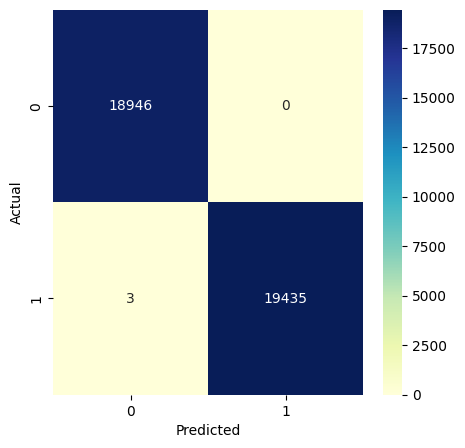

In [110]:
print(classification_report(y_test,y_predict))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predict, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [114]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=11)
rf_classifier.fit(X_train_selected, y_train)

y_predict = rf_classifier.predict(X_test_selected)


accuracy = accuracy_score(y_test,y_predict)
confusion = confusion_matrix(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score", f1)
print("Confusion Matrix:")
print(confusion)


Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score 1.0
Confusion Matrix:
[[18946     0]
 [    0 19438]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18946
           1       1.00      1.00      1.00     19438

    accuracy                           1.00     38384
   macro avg       1.00      1.00      1.00     38384
weighted avg       1.00      1.00      1.00     38384



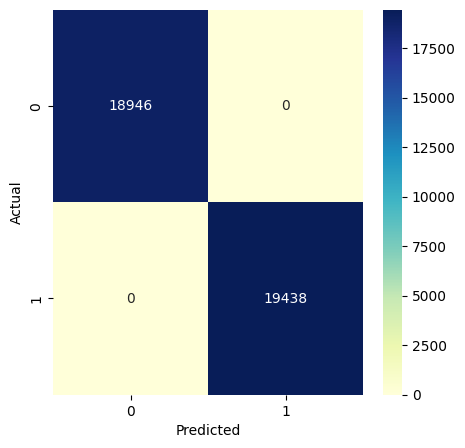

In [115]:
print(classification_report(y_test,y_predict))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predict, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

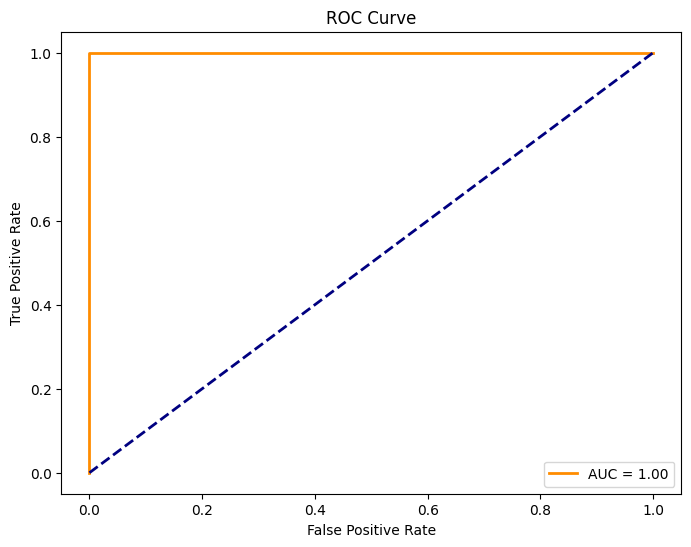

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [117]:
gb_classifier = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb_classifier.fit(X_train_selected, y_train)


y_predict = gb_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_predict)
confusion = confusion_matrix(y_test,y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score", f1)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9952063359733222
Recall: 0.9919744829714991
F1-score 0.9952513678125323
Precision: 0.9985499741066804
Confusion Matrix:
[[18918    28]
 [  156 19282]]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18946
           1       1.00      0.99      1.00     19438

    accuracy                           1.00     38384
   macro avg       1.00      1.00      1.00     38384
weighted avg       1.00      1.00      1.00     38384



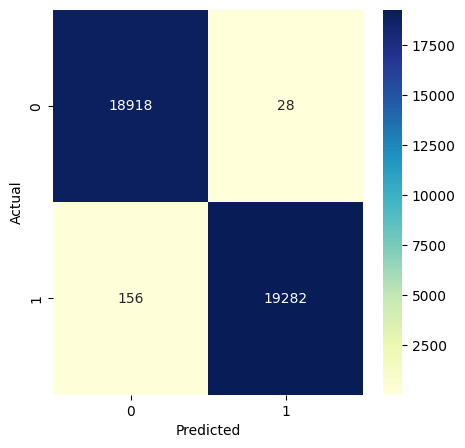

In [118]:
print(classification_report(y_test,y_predict))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predict, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

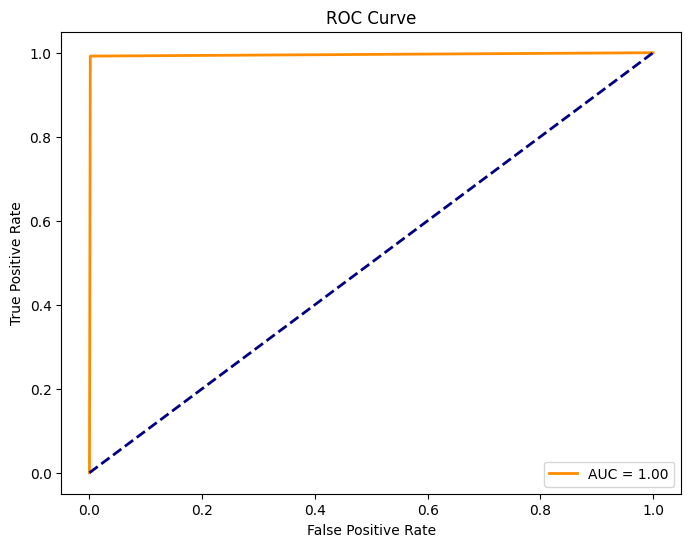

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [120]:
xgb_classifier = XGBClassifier(n_estimators=10, random_state=42)
xgb_classifier.fit(X_train_selected, y_train)

y_predict = xgb_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_predict)
confusion = confusion_matrix(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score", f1)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9998697373905794
Recall: 1.0
F1-score 0.9998714024845039
Precision: 0.9997428380393972
Confusion Matrix:
[[18941     5]
 [    0 19438]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18946
           1       1.00      1.00      1.00     19438

    accuracy                           1.00     38384
   macro avg       1.00      1.00      1.00     38384
weighted avg       1.00      1.00      1.00     38384



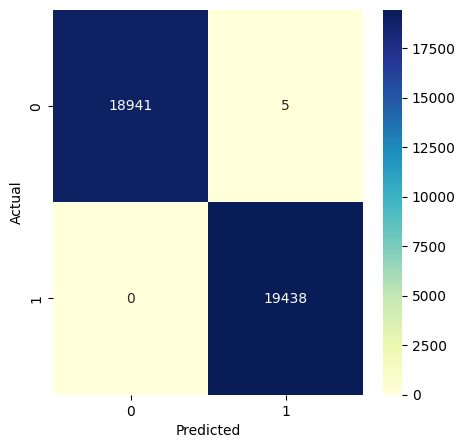

In [121]:
print(classification_report(y_test,y_predict))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predict, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [122]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled=scaler.fit_transform(X_test_selected)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

y_predict = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_predict)
confusion = confusion_matrix(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Accuracy:", accuracy)
print("F1-score", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9978115881617341
F1-score 0.9978396173036368
Recall: 0.9979936207428748
Precision: 0.997685661386546
Confusion Matrix:
[[18901    45]
 [   39 19399]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18946
           1       1.00      1.00      1.00     19438

    accuracy                           1.00     38384
   macro avg       1.00      1.00      1.00     38384
weighted avg       1.00      1.00      1.00     38384



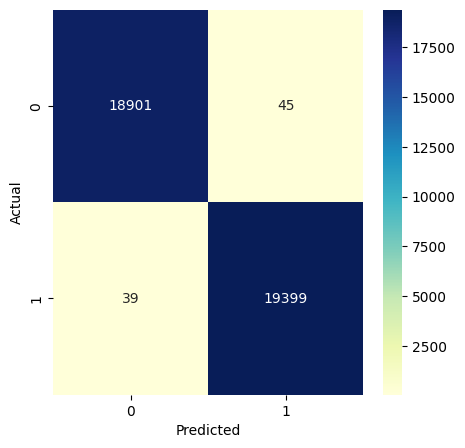

In [124]:
print(classification_report(y_test,y_predict))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predict, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

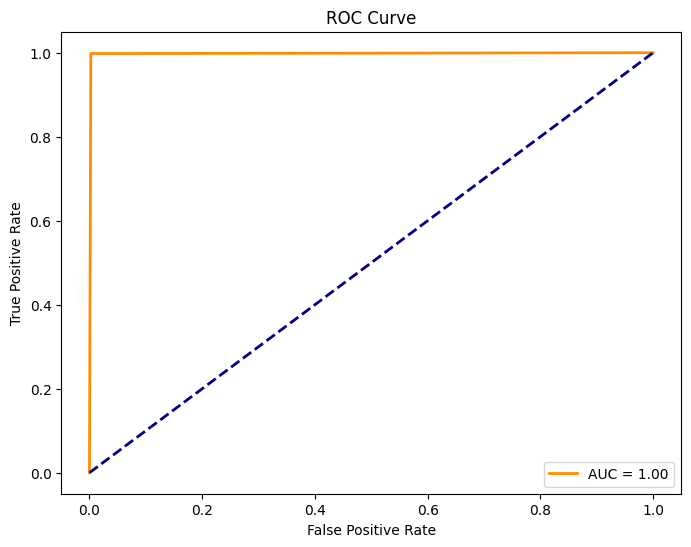

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()